In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import scipy.stats as ss
style.use("seaborn")
%matplotlib inline

from IPython.display import display
# from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# import bqplot.pyplot as bq

import warnings
warnings.filterwarnings("ignore")


# Distribución Normal

In [9]:
def ran_dist(x_med=0, 
             x_desv=1,
             x_n=100,
             origen=False):
    plt.figure(figsize=(14,8))
    plt.axvline(x=x_med, linestyle="--", linewidth=2.5, alpha=.75)
    plt.axvline(x=x_med-3*x_desv, linestyle=":", alpha=.5)
    plt.axvline(x=x_med-2*x_desv, linestyle=":", alpha=.5)
    plt.axvline(x=x_med-1*x_desv, linestyle=":", alpha=.5)
    plt.axvline(x=x_med+1*x_desv, linestyle=":", alpha=.5)
    plt.axvline(x=x_med+2*x_desv, linestyle=":", alpha=.5)
    plt.axvline(x=x_med+3*x_desv, linestyle=":", alpha=.5)
    x_rand = np.random.normal(x_med,x_desv,x_n)
    values, bins, _ = plt.hist(x_rand, density=False, alpha=0.4, edgecolor="k")#edgecolor , linewidth=2
    area = sum(np.diff(bins) * values)
    x_line = np.linspace(x_med+4*x_desv,
                         x_med-4*x_desv,
                         100)
    y_line=ss.norm.pdf(x_line, x_med, x_desv)*area
    if origen:
        plt.axvline(x=0, linestyle="--", color="k", alpha=.5)#, linewidth=2.5
        if min(x_line)>0:
            plt.xlim(0,max(x_line))
        if max(x_line)<0:
            plt.xlim(min(x_line), 0)
    plt.plot(x_line, y_line, '--', linewidth=2.5)
    title_tmpl = 'Distribución Normal (Promedio = {} Desviación estándar = {})'
    plt.title(title_tmpl.format(x_med, x_desv))
    plt.show()
    
def reset_values(b):
    """Reset the interactive plots to inital values."""
    origen.value=False
    x_med.value=0
    x_desv.value=1
    x_n.value=100

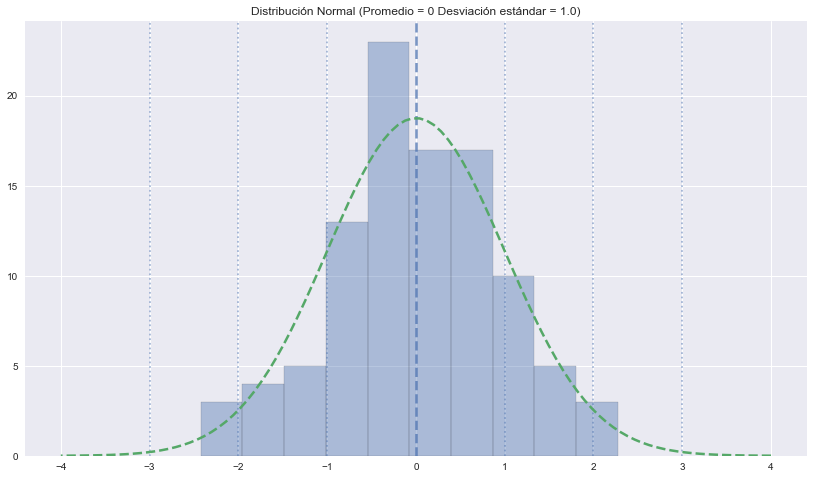

In [16]:
x_med = widgets.IntSlider(value=0,
                          min=-150,
                          max=150,
                          description='Promedio')
x_desv = widgets.FloatSlider(value=1,
                             min=1,
                             max=50,
                             step=.1,
                             description='Desv Estándar',
                             readout_format='.1f')
x_n = widgets.IntSlider(value=100,
                        min=2,
                        max=1500,
                        description='Tamaño muest')

reset_button = widgets.Button(description='Reiniciar valores')
reset_button.on_click(reset_values)

origen=widgets.ToggleButton(value=False,
                            description='Fijar Cero')#icon='check')

out = widgets.interactive_output(ran_dist, {'x_med': x_med, 'x_desv': x_desv, 'x_n': x_n, 'origen':origen})
controles_desliz=widgets.HBox([x_med, x_desv, x_n])
botones_settings=widgets.HBox([origen, reset_button])
widgets.VBox([botones_settings,controles_desliz,out])


In [8]:
# interact_randist = interactive(ran_dist, x_med=(5,150), x_desv=(1,50,.5), x_n=(2,1500))
# interact_randist